#### Import Library & Load Data

In [27]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier
from vecstack import StackingTransformer, stacking

In [28]:
data = pd.read_csv('./data/Elderly.csv')
data.shape

(1531, 11)

In [29]:
data.head()

,Gender,Age,Religion,Job,Married,Edu,Health,Self_conf,Earn,Activity,target
0,0,73,3,1.0,3,0,1,1,0,0,1
1,0,79,2,2.0,1,1,2,1,0,3,5
2,1,77,3,1.0,1,0,2,1,2,0,3
3,0,72,1,2.0,3,0,2,1,0,0,1
4,0,72,2,1.0,3,1,1,1,0,0,1


#### EDA

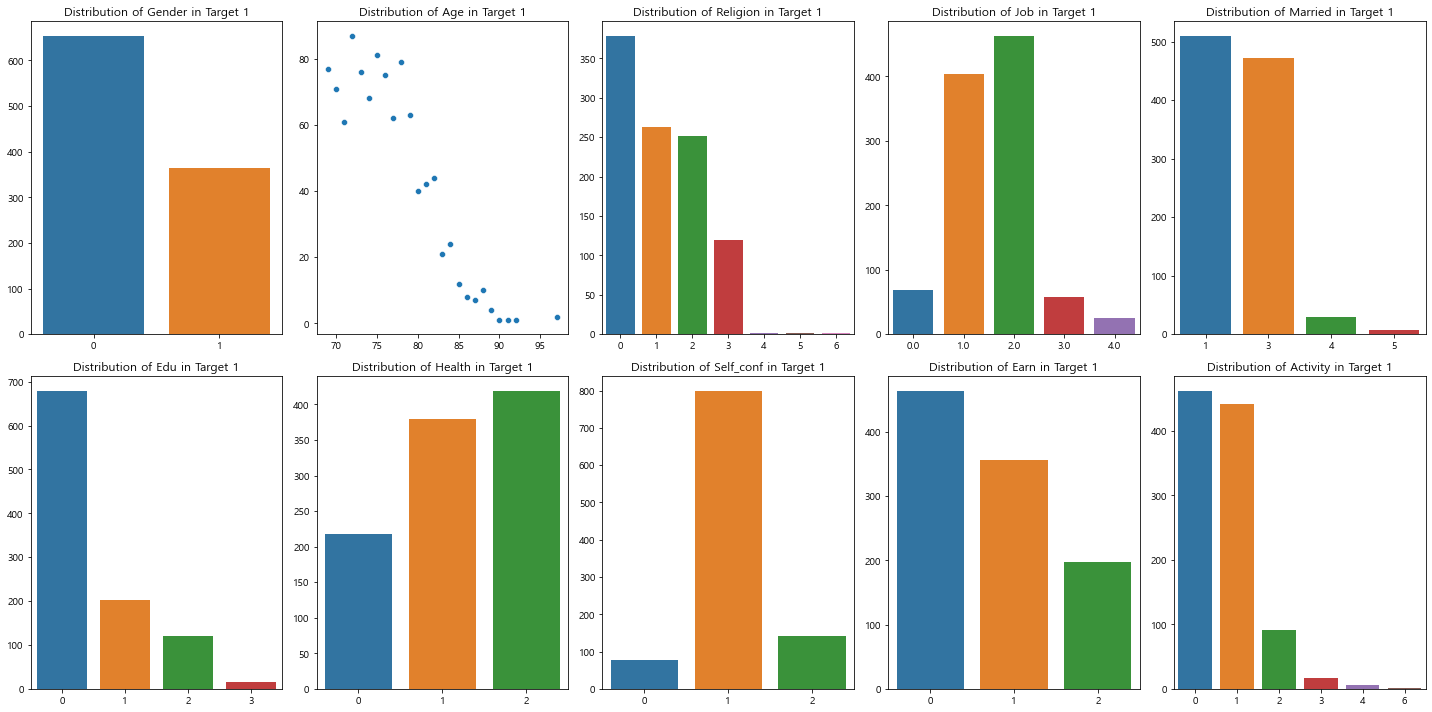

In [30]:
cols = data.drop(['target'], axis=1).columns
temp = data[data['target']==1]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 1')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 1')

plt.tight_layout()
plt.show()

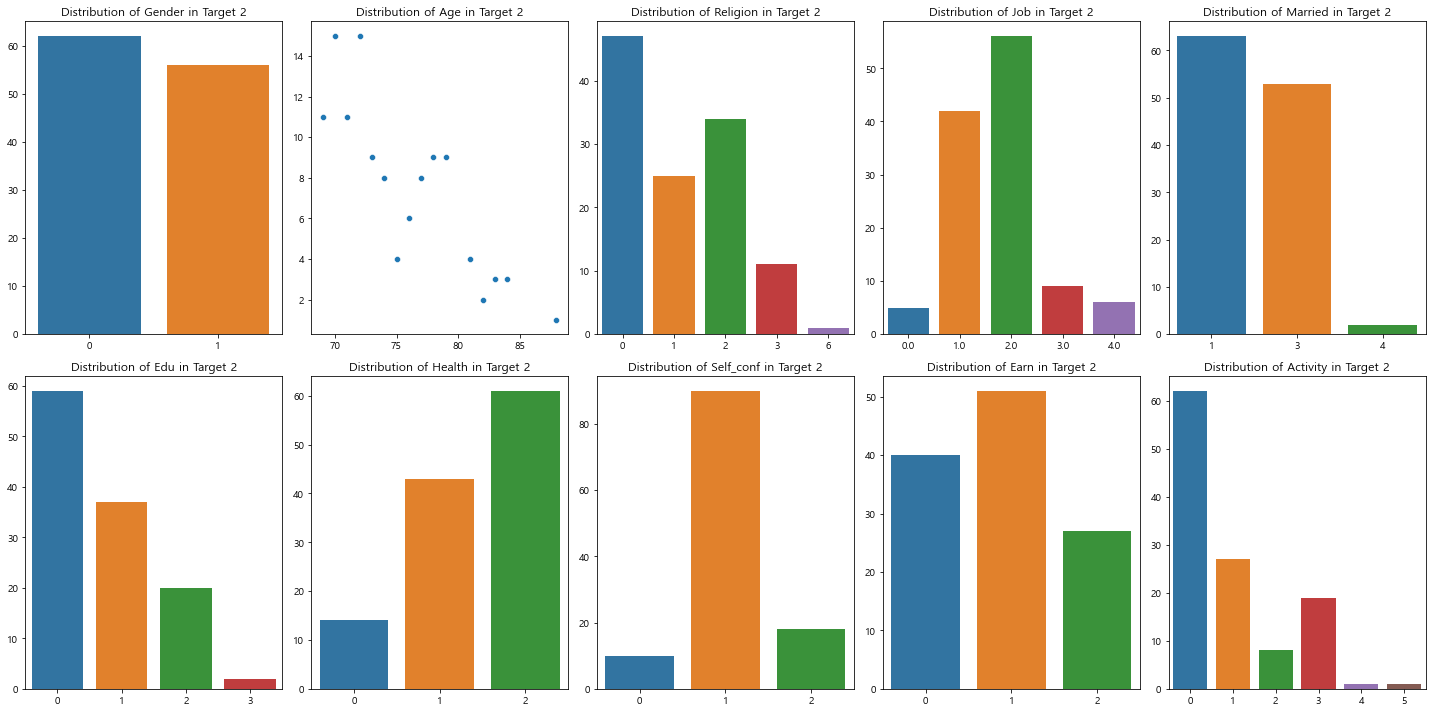

In [31]:
temp = data[data['target']==2]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 2')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 2')

plt.tight_layout()
plt.show()

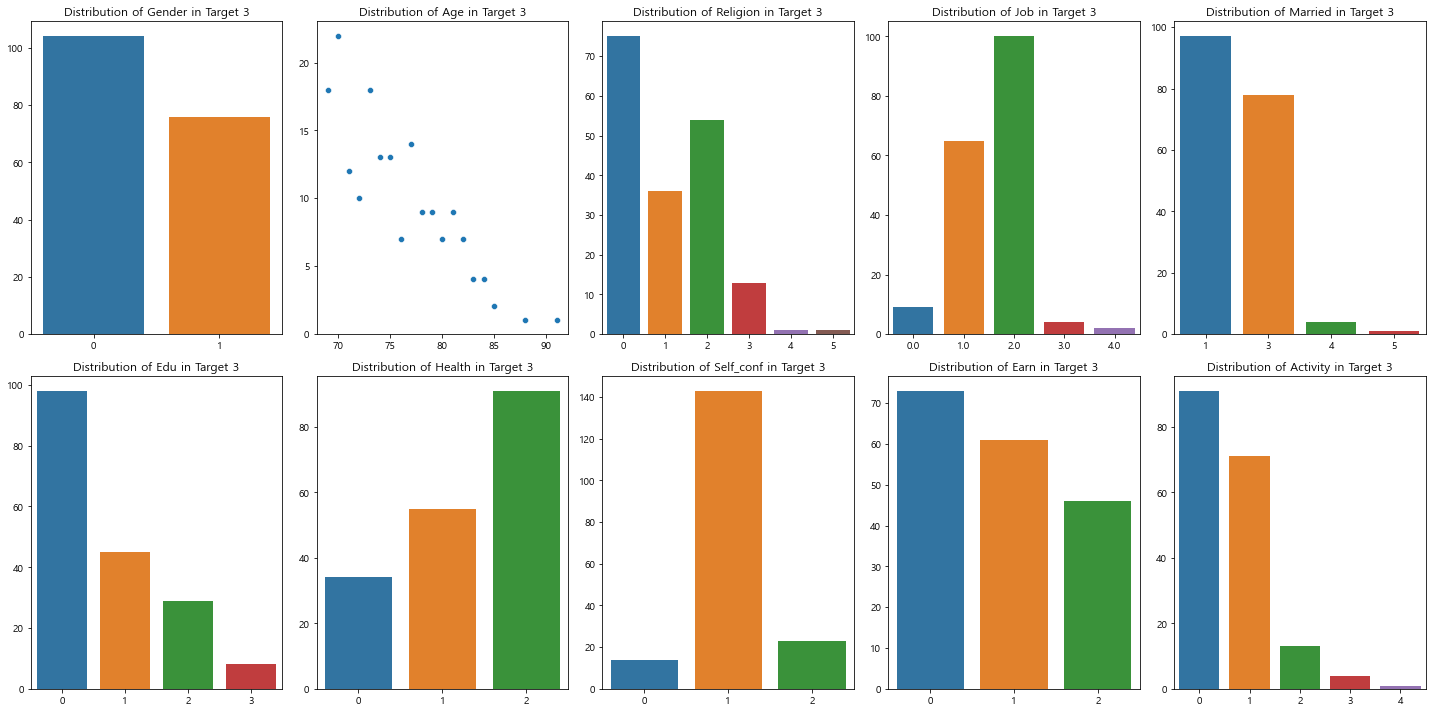

In [32]:
temp = data[data['target']==3]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 3')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 3')

plt.tight_layout()
plt.show()

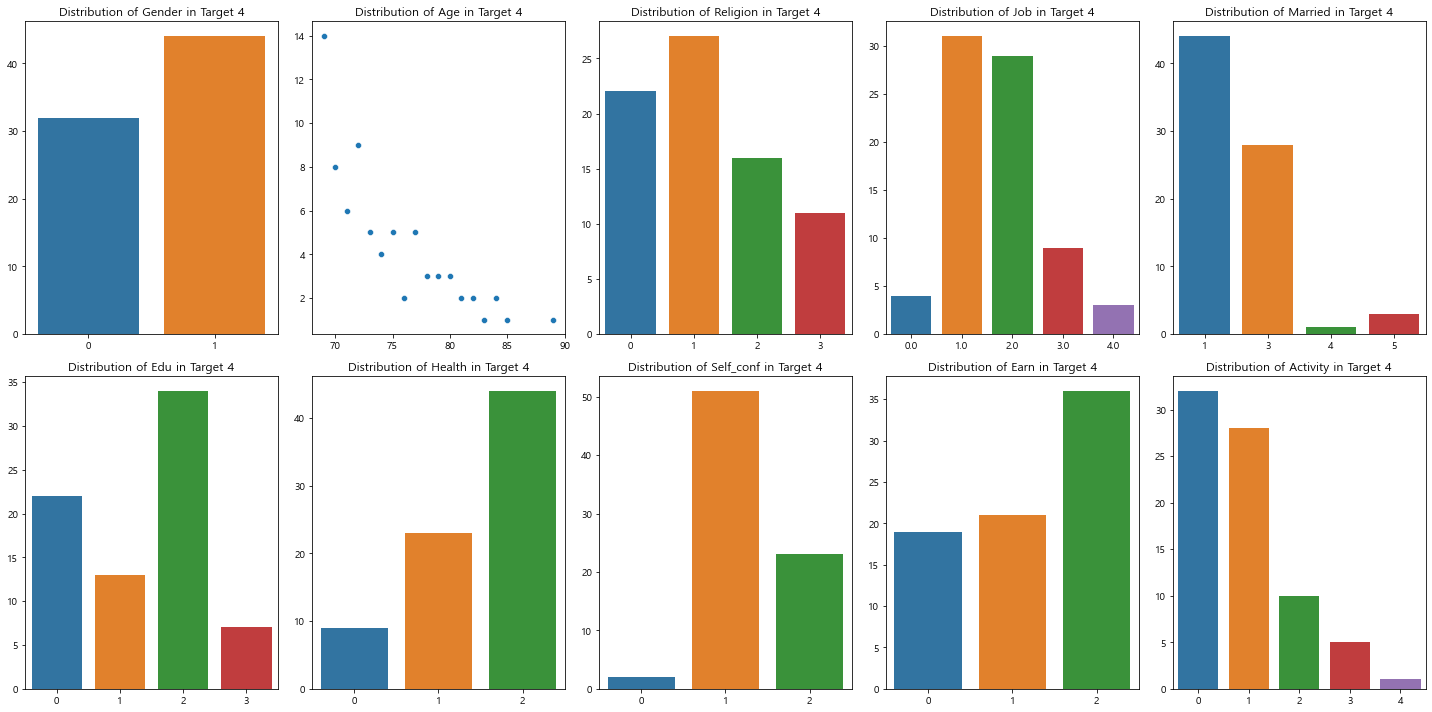

In [33]:
temp = data[data['target']==4]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 4')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 4')

plt.tight_layout()
plt.show()

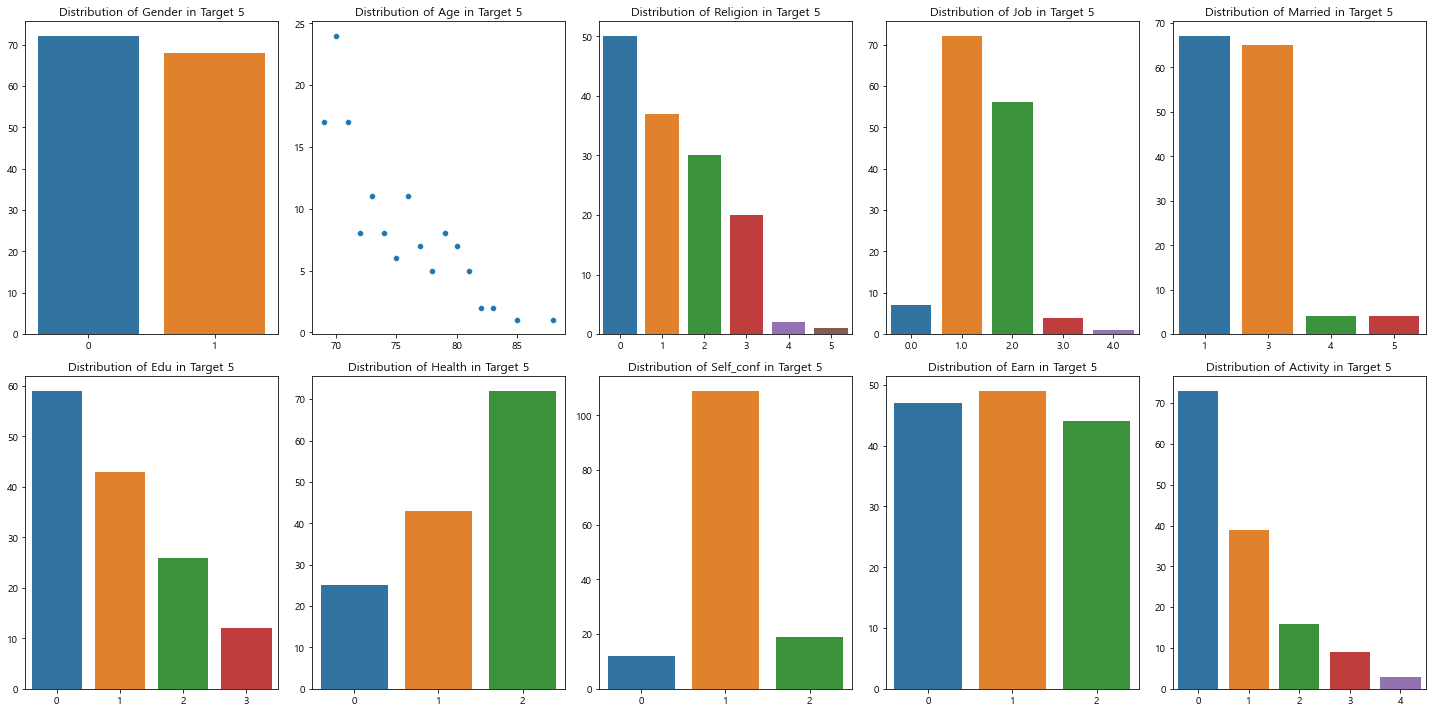

In [34]:
temp = data[data['target']==5]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 5')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 5')

plt.tight_layout()
plt.show()

#### Oversampling

In [35]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

In [36]:
y_train.value_counts()

1    813
3    144
5    112
2     94
4     61
Name: target, dtype: int64

In [37]:
oversampling_instance = SMOTE(random_state=2022)
X_train, y_train = oversampling_instance.fit_resample(X_train, y_train)
y_train.value_counts()

2    813
4    813
1    813
3    813
5    813
Name: target, dtype: int64

In [38]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly, y, stratify=y, test_size=0.2, random_state=2022)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict(X_test_2)
print('Polynomial LogisticRegression: ',accuracy_score(pred, y_test_2))

X_train_2, y_train_2 = oversampling_instance.fit_resample(X_train_2, y_train_2)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict(X_test_2)
print('Polynomial + SMOTE LogisticRegression: ',accuracy_score(pred, y_test_2))

Polynomial LogisticRegression:  0.6644951140065146
Polynomial + SMOTE LogisticRegression:  0.34201954397394135


In [39]:
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(pred, y_test)

0.2964169381107492

#### Modeling

In [40]:
# RandomSearch Tuning
tuned_models = []

clfs = [
(RandomForestClassifier(random_state=2022, n_jobs=-1),
    {'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 70, 90, 110],
    'max_depth': [3, 5, 7,10],
    'max_features': [0.8,0.85,0.9]}
),
(LGBMClassifier(random_state=2022, objective='multiclass', n_jobs=-1),
    {'learning_rate': np.arange(0.1, 0.6, 0.1),
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75,0.85,0.95]}
),
(XGBClassifier(random_state=2022),
    {'learning_rate': [0.05,0.35,0.65,1.0],
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75, 0.85, 0.95],
        'gamma': [0,2,4]}
),
(CatBoostClassifier(random_seed=2022),
    {'learning_rate': [0.05, 0.35, 0.65, 1.0],
    'n_estimators': [100,125,150,175,200],
    'max_depth':[3,5,7,9]}
),
(LogisticRegression(random_state=2022, multi_class='multinomial'),
    {'C': [100, 10, 1, 0.1, 0.01],
    'penalty':['none', 'l1', 'l2', 'elasticnet']}
)
]

for clf, param_grid in tqdm(clfs):
    rs = RandomizedSearchCV(clf, param_distributions = param_grid, scoring='accuracy', n_iter=30, random_state=2022, n_jobs=-1)
    scores = cross_val_score(rs, X_train, y_train, scoring='accuracy', cv = 5, n_jobs=-1)
    clf_name = type(clf).__name__
    clf_score = max(scores)

    print(f'모델: {clf_name:30} 성능: {clf_score}')
    
    tuned_models.append((clf_name, rs, clf_score))

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
bayesian_tuned = []

In [ ]:
# Bayesian Tuning of RandomForest

def objective(trial):
      
    rf_n_estimators = trial.suggest_int("n_estimators", 50, 150)
    rf_max_depth = trial.suggest_int("max_depth", 2, 10, log=True)
    rf_max_features = trial.suggest_float("max_features", 0.6, 0.95)
    rf_criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    

    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                            max_depth=rf_max_depth,
                                            max_features=rf_max_features,
                                            criterion=rf_criterion,
                                            n_jobs=-1, 
                                            random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 01:35:43,170] A new study created in memory with name: no-name-af32082e-c13c-4fec-99bc-22644b2d3df7
[I 2022-05-18 01:35:43,430] Trial 0 finished with value: 0.6730672078600795 and parameters: {'n_estimators': 76, 'max_depth': 8, 'max_features': 0.6126942871499385, 'criterion': 'gini'}. Best is trial 0 with value: 0.6730672078600795.
[I 2022-05-18 01:35:43,641] Trial 1 finished with value: 0.37269470187907927 and parameters: {'n_estimators': 65, 'max_depth': 3, 'max_features': 0.6392805135834546, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6730672078600795.
[I 2022-05-18 01:35:44,548] Trial 2 finished with value: 0.4364124354477814 and parameters: {'n_estimators': 130, 'max_depth': 4, 'max_features': 0.9352591225183188, 'criterion': 'gini'}. Best is trial 0 with value: 0.6730672078600795.
[I 2022-05-18 01:35:44,766] Trial 3 finished with value: 0.3584290970818913 and parameters: {'n_estimators': 84, 'max_depth': 2, 'max_features': 0.6106041368392362, 'criterion'

FrozenTrial(number=90, values=[0.7417006364248717], datetime_start=datetime.datetime(2022, 5, 18, 1, 36, 6, 419089), datetime_complete=datetime.datetime(2022, 5, 18, 1, 36, 6, 657089), params={'n_estimators': 97, 'max_depth': 10, 'max_features': 0.6775429578642388, 'criterion': 'entropy'}, distributions={'n_estimators': IntUniformDistribution(high=150, low=50, step=1), 'max_depth': IntLogUniformDistribution(high=10, low=2, step=1), 'max_features': UniformDistribution(high=0.95, low=0.6), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=90, state=TrialState.COMPLETE, value=None)
[0.65313653 0.77859779 0.73431734 0.75768758 0.77244772]
최대 성능: {0.7785977859778598} 평균 성능: {0.7392373923739237}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of LGBM

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 01:36:18,906] A new study created in memory with name: no-name-cfaddba9-ff8f-4402-91ee-d62c19d46651
[I 2022-05-18 01:36:19,797] Trial 0 finished with value: 0.6300146524825989 and parameters: {'n_estimators': 155, 'max_depth': 2, 'min_child_weight': 13, 'learning_rate': 0.6741412728997296, 'subsample': 0.8170427395977098}. Best is trial 0 with value: 0.6300146524825989.
[I 2022-05-18 01:36:20,765] Trial 1 finished with value: 0.7638426764685388 and parameters: {'n_estimators': 129, 'max_depth': 9, 'min_child_weight': 15, 'learning_rate': 0.3376171551375295, 'subsample': 0.9266002286000221}. Best is trial 1 with value: 0.7638426764685388.
[I 2022-05-18 01:36:21,801] Trial 2 finished with value: 0.7869643714336593 and parameters: {'n_estimators': 159, 'max_depth': 10, 'min_child_weight': 5, 'learning_rate': 0.6790707541028624, 'subsample': 0.9246250821109607}. Best is trial 2 with value: 0.7869643714336593.
[I 2022-05-18 01:36:23,899] Trial 3 finished with value: 0.79065362

FrozenTrial(number=80, values=[0.8017230700144783], datetime_start=datetime.datetime(2022, 5, 18, 1, 37, 13, 3832), datetime_complete=datetime.datetime(2022, 5, 18, 1, 37, 13, 582415), params={'n_estimators': 124, 'max_depth': 10, 'min_child_weight': 3, 'learning_rate': 0.20493652108722493, 'subsample': 0.9425406263174294}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05), 'subsample': UniformDistribution(high=0.95, low=0.7)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=80, state=TrialState.COMPLETE, value=None)
[0.67650677 0.83517835 0.78474785 0.81303813 0.83148831]
최대 성능: {0.8351783517835178} 평균 성능: {0.7881918819188192}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of XGB

def objective(trial):
    
    xgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    xgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    xgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    xgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    xgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    xgb_gamma = trial.suggest_int('gamma', 0, 5)
    

    classifier_obj = XGBClassifier(n_estimators=xgb_n_estimators, 
                                    max_depth=xgb_max_depth,
                                    min_child_weight=xgb_min_child_weight,
                                    learning_rate=xgb_learning_rate,
                                    subsample = xgb_subsample,
                                    gamma = xgb_gamma,
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = XGBClassifier(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 01:37:27,237] A new study created in memory with name: no-name-c3985a99-6994-4fa0-915a-ea6b0154863b
[I 2022-05-18 01:37:28,006] Trial 0 finished with value: 0.578112055683305 and parameters: {'n_estimators': 189, 'max_depth': 2, 'min_child_weight': 7, 'learning_rate': 0.3384281534292994, 'subsample': 0.7995164272931861, 'gamma': 2}. Best is trial 0 with value: 0.578112055683305.
[I 2022-05-18 01:37:29,265] Trial 1 finished with value: 0.6831511934901943 and parameters: {'n_estimators': 157, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.05708443671616488, 'subsample': 0.7697388824131833, 'gamma': 1}. Best is trial 1 with value: 0.6831511934901943.
[I 2022-05-18 01:37:31,507] Trial 2 finished with value: 0.7980318831827438 and parameters: {'n_estimators': 140, 'max_depth': 10, 'min_child_weight': 2, 'learning_rate': 0.21949079965889695, 'subsample': 0.7510719441715179, 'gamma': 0}. Best is trial 2 with value: 0.7980318831827438.
[I 2022-05-18 01:37:32,342] Trial

FrozenTrial(number=92, values=[0.8056583842395807], datetime_start=datetime.datetime(2022, 5, 18, 1, 40, 30, 347576), datetime_complete=datetime.datetime(2022, 5, 18, 1, 40, 33, 19774), params={'n_estimators': 179, 'max_depth': 10, 'min_child_weight': 3, 'learning_rate': 0.19655372249487754, 'subsample': 0.8496895181872067, 'gamma': 0}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05), 'subsample': UniformDistribution(high=0.95, low=0.7), 'gamma': IntUniformDistribution(high=5, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=92, state=TrialState.COMPLETE, value=None)
[0.68511685 0.85239852 0.78351784 0.82779828 0.83886839]
최대 성능: {0.8523985239852399} 평균 성능: {0.7975399753997541}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of Catboost

def objective(trial):
      
    cat_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    cat_max_depth = trial.suggest_int("max_depth", 2, 10)
    cat_learning_rate = trial.suggest_float("learning_rate", 0.05, 0.8)

    classifier_obj = CatBoostClassifier(n_estimators=cat_n_estimators, 
                                    max_depth=cat_max_depth,
                                    learning_rate=cat_learning_rate,
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=72)
print(study.best_trial)

model = CatBoostClassifier(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 01:41:23,951] A new study created in memory with name: no-name-79c66ee2-2528-4386-a974-f23b14558fd8
[I 2022-05-18 01:41:32,299] Trial 0 finished with value: 0.7798304802607638 and parameters: {'n_estimators': 184, 'max_depth': 10, 'learning_rate': 0.6965262465233949}. Best is trial 0 with value: 0.7798304802607638.
[I 2022-05-18 01:41:33,397] Trial 1 finished with value: 0.7099660108858074 and parameters: {'n_estimators': 159, 'max_depth': 4, 'learning_rate': 0.33015170097205476}. Best is trial 0 with value: 0.7798304802607638.
[I 2022-05-18 01:41:34,231] Trial 2 finished with value: 0.5220220329206637 and parameters: {'n_estimators': 112, 'max_depth': 2, 'learning_rate': 0.23690867992885722}. Best is trial 0 with value: 0.7798304802607638.
[I 2022-05-18 01:41:35,414] Trial 3 finished with value: 0.7340734095185005 and parameters: {'n_estimators': 159, 'max_depth': 4, 'learning_rate': 0.660457797591422}. Best is trial 0 with value: 0.7798304802607638.
[I 2022-05-18 01:41:

FrozenTrial(number=18, values=[0.8022149540488854], datetime_start=datetime.datetime(2022, 5, 18, 1, 42, 1, 55210), datetime_complete=datetime.datetime(2022, 5, 18, 1, 42, 2, 370993), params={'n_estimators': 171, 'max_depth': 7, 'learning_rate': 0.5820148019901643}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=18, state=TrialState.COMPLETE, value=None)
[0.69372694 0.81672817 0.77613776 0.80565806 0.83763838]
최대 성능: {0.8376383763837638} 평균 성능: {0.7859778597785978}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# Bayesian Tuning of LogisticRegression

def objective(trial):
      
    lr_c = trial.suggest_float("C", 0.01, 100)


    classifier_obj = LogisticRegression(C=lr_c, 
                                    multi_class='multinomial',
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = LogisticRegression(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 01:48:20,378] A new study created in memory with name: no-name-b5e35ebc-b582-473d-a602-5a41a0c1d6ba
[I 2022-05-18 01:48:20,515] Trial 0 finished with value: 0.31980228826485185 and parameters: {'C': 69.34445810640872}. Best is trial 0 with value: 0.31980228826485185.
[I 2022-05-18 01:48:20,634] Trial 1 finished with value: 0.3205407191910746 and parameters: {'C': 45.409415049789494}. Best is trial 1 with value: 0.3205407191910746.
[I 2022-05-18 01:48:20,748] Trial 2 finished with value: 0.3180805731695043 and parameters: {'C': 66.19130462942158}. Best is trial 1 with value: 0.3205407191910746.
[I 2022-05-18 01:48:20,873] Trial 3 finished with value: 0.31980228826485185 and parameters: {'C': 64.25581775463698}. Best is trial 1 with value: 0.3205407191910746.
[I 2022-05-18 01:48:20,990] Trial 4 finished with value: 0.31808081511934905 and parameters: {'C': 66.43488958644586}. Best is trial 1 with value: 0.3205407191910746.
[I 2022-05-18 01:48:21,108] Trial 5 finished with v

FrozenTrial(number=59, values=[0.32275504417036366], datetime_start=datetime.datetime(2022, 5, 18, 1, 48, 27, 640052), datetime_complete=datetime.datetime(2022, 5, 18, 1, 48, 27, 766051), params={'C': 9.615529557855602}, distributions={'C': UniformDistribution(high=100.0, low=0.01)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=59, state=TrialState.COMPLETE, value=None)
[0.27429274 0.33333333 0.3603936  0.32841328 0.31734317]
최대 성능: {0.36039360393603936} 평균 성능: {0.3227552275522755}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

#### Stacking

In [ ]:
# RandomsearchCV Model
print("RandomSearch CV:", tuned_models)
rf_rs = (tuned_models[0][0],tuned_models[0][1])
lgb_rs = (tuned_models[1][0],tuned_models[1][1])
xgb_rs = (tuned_models[2][0],tuned_models[2][1])
cat_rs = (tuned_models[3][0],tuned_models[3][1])

estimators = [rf_rs, lgb_rs, xgb_rs, cat_rs]
ensemble_softVoting = VotingClassifier(estimators= estimators, voting='soft', n_jobs=-1)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)

print('앙상블 성능: ', np.mean(cross_val_score(ensemble_softVoting, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)))

ensemble_softVoting.fit(X_train, y_train)

pred_rs_voting = ensemble_softVoting.predict(X_test)

RandomSearch CV: [('RandomForestClassifier', RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': [0.8, 0.85, 0.9],
                                        'n_estimators': [50, 70, 90, 110]},
                   random_state=2022, scoring='accuracy'), 0.7626076260762608), ('LGBMClassifier', RandomizedSearchCV(estimator=LGBMClassifier(objective='multiclass',
                                            random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight

In [ ]:
stack_estimators = [estimators[i][1].estimator for i in range(len(estimators))]
S_train, S_test = stacking(stack_estimators,
                        X_train, y_train, X_test, regression=False, needs_proba=True, metric='accuracy', n_folds=4, stratified=True, shuffle=True, random_state=2022)

[02:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
# Meta Model Optimiazaiton

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.01, 1.5)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    lgb_colsample_bytree = trial.suggest_float("colsample_bytree", 0.75, 0.9)
    lgb_num_leaves = trial.suggest_int('num_leaves', 2, 10)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    colsample_bytree= lgb_colsample_bytree,
                                    num_leaves = lgb_num_leaves,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

rs_meta = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
scores = cross_val_score(rs_meta, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

rs_meta.fit(S_train, y_train)
pred_rs = rs_meta.predict(S_test)

[I 2022-05-18 02:29:31,561] A new study created in memory with name: no-name-00f062a0-3fe4-409d-a2ec-66b47f9bcb9f
[I 2022-05-18 02:29:32,237] Trial 0 finished with value: 0.8063980249150272 and parameters: {'n_estimators': 130, 'max_depth': 9, 'min_child_weight': 12, 'learning_rate': 0.08969741844295177, 'subsample': 0.8755125457045078, 'colsample_bytree': 0.8683393115327985, 'num_leaves': 5}. Best is trial 0 with value: 0.8063980249150272.
[I 2022-05-18 02:29:32,507] Trial 1 finished with value: 0.8164832202943659 and parameters: {'n_estimators': 56, 'max_depth': 8, 'min_child_weight': 4, 'learning_rate': 0.04059068703777302, 'subsample': 0.8589857969115254, 'colsample_bytree': 0.8974368233619126, 'num_leaves': 5}. Best is trial 1 with value: 0.8164832202943659.
[I 2022-05-18 02:29:32,900] Trial 2 finished with value: 0.8076290657251914 and parameters: {'n_estimators': 128, 'max_depth': 2, 'min_child_weight': 2, 'learning_rate': 0.16409656709386172, 'subsample': 0.711204113107609, 'co

FrozenTrial(number=91, values=[0.8196820391920037], datetime_start=datetime.datetime(2022, 5, 18, 2, 29, 56, 657289), datetime_complete=datetime.datetime(2022, 5, 18, 2, 29, 56, 760289), params={'n_estimators': 61, 'max_depth': 8, 'min_child_weight': 3, 'learning_rate': 0.025823600424097412, 'subsample': 0.8312082355348605, 'colsample_bytree': 0.8750143972335032, 'num_leaves': 3}, distributions={'n_estimators': IntUniformDistribution(high=250, low=50, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=1.5, low=0.01), 'subsample': UniformDistribution(high=0.95, low=0.7), 'colsample_bytree': UniformDistribution(high=0.9, low=0.75), 'num_leaves': IntUniformDistribution(high=10, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=91, state=TrialState.COMPLETE, value=None)
[0.8072763  0.82283465 0.82185039 0.81299213]
최대 성능: {0.822834

In [ ]:
# Bayesian Model
print("Bayesian Optimizier :", bayesian_tuned)
rf_bs = (bayesian_tuned[0][0],bayesian_tuned[0][1])
lgb_bs = (bayesian_tuned[1][0],bayesian_tuned[1][1])
xgb_bs = (bayesian_tuned[2][0],bayesian_tuned[2][1])
cat_bs = (bayesian_tuned[3][0],bayesian_tuned[3][1])

estimators = [rf_bs, lgb_bs, xgb_bs, cat_bs]
ensemble_softVoting = VotingClassifier(estimators= estimators, voting='soft', n_jobs=-1)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)

print('앙상블 성능: ', np.mean(cross_val_score(ensemble_softVoting, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)))

ensemble_softVoting.fit(X_train, y_train)

pred_bs_voting = ensemble_softVoting.predict(X_test)

Bayesian Optimizier : [('RandomForestClassifier', RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.6775429578642388, n_estimators=97,
                       n_jobs=-1, random_state=2020), 0.7785977859778598), ('LGBMClassifier', LGBMClassifier(learning_rate=0.20493652108722493, max_depth=10,
               min_child_weight=3, n_estimators=124, random_state=2020,
               subsample=0.9425406263174294), 0.8351783517835178), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.19655372249487754, max_delta_step=None,
              max_depth=10, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=179, n_jobs=None,
              num_parallel_tree=None, predic

In [ ]:
stack_estimators = [estimators[i][1] for i in range(len(estimators))]
S_train, S_test = stacking(stack_estimators,
                        X_train, y_train, X_test, regression=False, needs_proba=True, metric='accuracy', n_folds=4, stratified=True, shuffle=True, random_state=2022)

[02:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
# Meta Model Optimiazaiton

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.01, 1.5)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    lgb_colsample_bytree = trial.suggest_float("colsample_bytree", 0.75, 0.9)
    lgb_num_leaves = trial.suggest_int('num_leaves', 2, 10)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    colsample_bytree= lgb_colsample_bytree,
                                    num_leaves = lgb_num_leaves,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

bs_meta = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
scores = cross_val_score(bs_meta, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bs_meta.fit(S_train, y_train)
pred_bs = bs_meta.predict(S_test)

[I 2022-05-18 02:36:09,918] A new study created in memory with name: no-name-287401be-c1e0-436f-b84a-af54d5cc66ed
[I 2022-05-18 02:36:12,089] Trial 0 finished with value: 0.813281497998591 and parameters: {'n_estimators': 99, 'max_depth': 6, 'min_child_weight': 14, 'learning_rate': 0.013223089214144473, 'subsample': 0.7326061095667957, 'colsample_bytree': 0.8691378934911101, 'num_leaves': 2}. Best is trial 0 with value: 0.813281497998591.
[I 2022-05-18 02:36:12,392] Trial 1 finished with value: 0.7692524330476389 and parameters: {'n_estimators': 197, 'max_depth': 2, 'min_child_weight': 14, 'learning_rate': 1.2309005974645106, 'subsample': 0.9480929925653133, 'colsample_bytree': 0.7943905791832976, 'num_leaves': 2}. Best is trial 0 with value: 0.813281497998591.
[I 2022-05-18 02:36:13,998] Trial 2 finished with value: 0.7726958632383341 and parameters: {'n_estimators': 159, 'max_depth': 2, 'min_child_weight': 13, 'learning_rate': 0.6724507441764963, 'subsample': 0.9391646563831497, 'col

FrozenTrial(number=66, values=[0.8157423698696955], datetime_start=datetime.datetime(2022, 5, 18, 2, 36, 28, 821181), datetime_complete=datetime.datetime(2022, 5, 18, 2, 36, 28, 948179), params={'n_estimators': 75, 'max_depth': 8, 'min_child_weight': 7, 'learning_rate': 0.010146329108476192, 'subsample': 0.7129695276370358, 'colsample_bytree': 0.8126066693060369, 'num_leaves': 2}, distributions={'n_estimators': IntUniformDistribution(high=250, low=50, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=1.5, low=0.01), 'subsample': UniformDistribution(high=0.95, low=0.7), 'colsample_bytree': UniformDistribution(high=0.9, low=0.75), 'num_leaves': IntUniformDistribution(high=10, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=66, state=TrialState.COMPLETE, value=None)
[0.82399213 0.80807087 0.82480315 0.80708661]
최대 성능: {0.824803

In [ ]:
# 단일 모델 성능 (RandomSearchCV)
for i in range(len(tuned_models)):
    model = tuned_models[i][1]
    model.fit(X_train, y_train)
    print(f'Accuracy score of {tuned_models[i][0]}:', accuracy_score(y_test, model.predict(X_test)))

Accuracy score of RandomForestClassifier: 0.4527687296416938
Accuracy score of LGBMClassifier: 0.504885993485342
[02:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of XGBClassifier: 0.498371335504886
0:	learn: 1.4891027	total: 6.67ms	remaining: 1.33s
1:	learn: 1.3816092	total: 13.3ms	remaining: 1.32s
2:	learn: 1.3107394	total: 20.2ms	remaining: 1.32s
3:	learn: 1.2527116	total: 26.6ms	remaining: 1.3s
4:	learn: 1.2100730	total: 33.6ms	remaining: 1.31s
5:	learn: 1.1719853	total: 40.2ms	remaining: 1.3s
6:	learn: 1.1394817	total: 46.8ms	remaining: 1.29s
7:	learn: 1.0977662	total: 53.6ms	remaining: 1.28s
8:	learn: 1.0770227	total: 60.3ms	remaining: 1.28s
9:	learn: 1.0364466	total: 67.8ms	remaining: 1.29s
10:	learn: 1.0053

In [ ]:
# 단일 모델 성능 (Bayesian)
for i in range(len(bayesian_tuned)):
    model = bayesian_tuned[i][1]
    model.fit(X_train, y_train)
    print(f'Accuracy score of {bayesian_tuned[i][0]}:', accuracy_score(y_test, model.predict(X_test)))

Accuracy score of RandomForestClassifier: 0.4592833876221498
Accuracy score of LGBMClassifier: 0.495114006514658
[02:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score of XGBClassifier: 0.48534201954397393
0:	learn: 1.4392297	total: 7ms	remaining: 1.19s
1:	learn: 1.3152414	total: 13.7ms	remaining: 1.16s
2:	learn: 1.2198177	total: 20.9ms	remaining: 1.17s
3:	learn: 1.1338516	total: 28.1ms	remaining: 1.17s
4:	learn: 1.0829589	total: 34.9ms	remaining: 1.16s
5:	learn: 1.0333678	total: 41.6ms	remaining: 1.14s
6:	learn: 0.9899354	total: 48.5ms	remaining: 1.14s
7:	learn: 0.9472291	total: 55.4ms	remaining: 1.13s
8:	learn: 0.9317729	total: 62.1ms	remaining: 1.12s
9:	learn: 0.8985943	total: 69ms	remaining: 1.11s
10:	learn: 0.86102

In [ ]:
# 앙상블 모델 성능
print('Accuracy score of RandomsearchCV + Voting:', accuracy_score(y_test, pred_rs_voting))
print('Accuracy score of RandomsearchCV + Stacking:', accuracy_score(y_test, pred_rs))
print('Accuracy score of Bayesian Optimization + Voting:', accuracy_score(y_test, pred_bs_voting))
print('Accuracy score of Bayesian Optimization + Stacking:', accuracy_score(y_test, pred_bs))

Accuracy score of RandomsearchCV + Voting: 0.50814332247557
Accuracy score of RandomsearchCV + Stacking: 0.5635179153094463
Accuracy score of Bayesian Optimization + Voting: 0.501628664495114
Accuracy score of Bayesian Optimization + Stacking: 0.5342019543973942


In [ ]:
pred = pd.DataFrame({'RS_voting':pred_rs_voting, 'RS_Stacking':pred_rs, 'Bayesian_voting':pred_bs_voting, 'Bayesian_Stacking':pred_bs})
pred.to_csv('Predict.csv', encoding='utf-8', index=False)

In [ ]:
import joblib
joblib.dump(rs_meta, './models/best_model_2.pkl')

['./best_model.pkl']

In [ ]:
rf_model = tuned_models[0][1].best_estimator_
lgb_model = tuned_models[1][1].best_estimator_
xgb_model = tuned_models[2][1].best_estimator_
cat_model = tuned_models[3][1].best_estimator_

In [ ]:
joblib.dump(rf_model, './models/RandomForest_2.pkl')
joblib.dump(lgb_model, './models/LGBoost_2.pkl')
joblib.dump(xgb_model, './models/XGBoost_2.pkl')
joblib.dump(cat_model, './models/CatBoost_2.pkl')

['./CatBoost.pkl']

In [ ]:
model = joblib.load('./models/best_model_2.pkl')
model.predict(S_test)

array([1, 1, 3, 3, 4, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 5,
       1, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 5, 5, 1, 1, 2, 1, 2, 1, 1, 3, 1,
       1, 1, 3, 2, 2, 3, 3, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 1, 1, 1, 3, 3, 3, 1, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 2, 1, 5, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 3, 4, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 5, 5, 1, 1, 5, 1, 2, 1, 1, 3, 1, 5, 1, 3, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 3, 1, 1, 3, 1, 1,
       1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1,